In [58]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [59]:
kelembaban_tanah = ctrl.Antecedent(np.arange(0, 101, 1), 'Kelembaban Tanah')
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'Suhu')
pompa_air = ctrl.Consequent(np.arange(0, 11, 1), 'Pompa Air')
fan = ctrl.Consequent(np.arange(0, 11, 1), 'Fan')

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


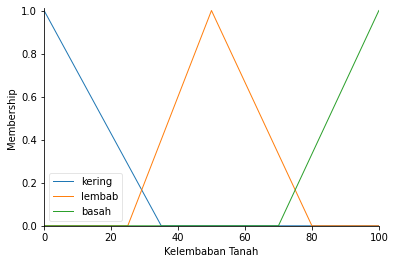

In [60]:
kelembaban_tanah['kering'] = fuzz.trimf(kelembaban_tanah.universe, [0, 0, 35])
kelembaban_tanah['lembab'] = fuzz.trimf(kelembaban_tanah.universe, [25, 50, 80])
kelembaban_tanah['basah'] = fuzz.trimf(kelembaban_tanah.universe, [70, 100, 100])
kelembaban_tanah.view()

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


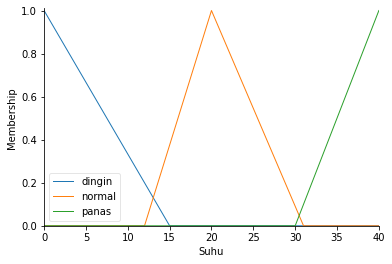

In [61]:
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 15])
suhu['normal'] = fuzz.trimf(suhu.universe, [12, 20, 31])
suhu['panas'] = fuzz.trimf(suhu.universe, [30, 40, 40])
suhu.view()

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


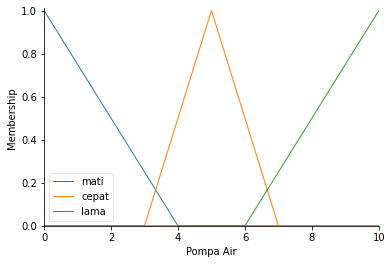

In [62]:
pompa_air['mati'] = fuzz.trimf(pompa_air.universe, [0, 0, 4])
pompa_air['cepat'] = fuzz.trimf(pompa_air.universe, [3, 5, 7])
pompa_air['lama'] = fuzz.trimf(pompa_air.universe, [6, 10, 10])
pompa_air.view()

C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


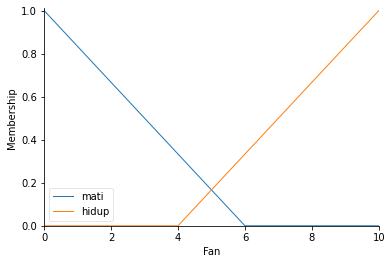

In [63]:
fan['mati'] = fuzz.trimf(fan.universe, [0, 0, 6])
fan['hidup'] = fuzz.trimf(fan.universe, [4, 10, 10])
fan.view()

In [64]:
rule1 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['dingin'], pompa_air['lama'])
rule2 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['dingin'], fan['mati'])
rule3 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['normal'], pompa_air['lama'])
rule4 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['normal'], fan['mati'])
rule5 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['panas'], pompa_air['lama'])
rule6 = ctrl.Rule(kelembaban_tanah['kering'] & suhu['panas'], fan['hidup'])
rule7 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['dingin'], pompa_air['mati'])
rule8 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['dingin'], fan['mati'])
rule9 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['normal'], pompa_air['cepat'])
rule10 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['normal'], fan['mati'])
rule11 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['panas'], pompa_air['cepat'])
rule12 = ctrl.Rule(kelembaban_tanah['lembab'] & suhu['panas'], fan['hidup'])
rule13 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['dingin'], pompa_air['mati'])
rule14 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['dingin'], fan['mati'])
rule15 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['normal'], pompa_air['mati'])
rule16 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['normal'], fan['mati'])
rule17 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['panas'], pompa_air['mati'])
rule18 = ctrl.Rule(kelembaban_tanah['basah'] & suhu['panas'], fan['hidup'])

In [65]:
output_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])

In [66]:
penyiraman_output = ctrl.ControlSystemSimulation(output_ctrl)

In [67]:
penyiraman_output.input['Kelembaban Tanah'] = 80
penyiraman_output.input['Suhu'] = 31
penyiraman_output.compute()

1.9017543859649122
7.147368421052632


C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


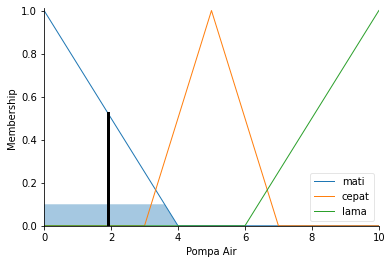

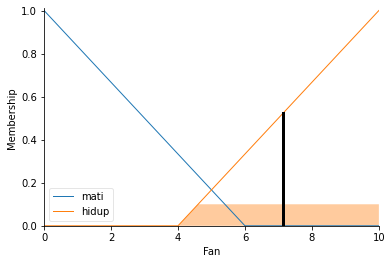

In [68]:
print(penyiraman_output.output['Pompa Air'])
print(penyiraman_output.output['Fan'])

pompa_air.view(sim=penyiraman_output)
fan.view(sim=penyiraman_output)